In [55]:
#Intializations
from math import pi, cos, sin
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [56]:
#Generating random points within a circle
def random_point_circle(r:int,xc:int,yc:int):
    '''
    PARAMETERS
    ----------
    r: int
        Radius of the circle
    xc: int
        x value of the center
    yc: int
        y value of the center of the circle
    
    
    '''
    r = r*(random.random())**.5
    theta = 2*pi*random.random()

    return xc+r*cos(theta),yc+r*sin(theta)

r=1
x=2
y=2

xpoints = []
ypoints = []
for i in range(1000):
    point = random_point_circle(r,x,y)
    xpoints.append(point[0])
    ypoints.append(point[1])

#Generating random points outside the circle 
xrpoints = []
yrpoints = []
j=0
while j<1000:
    xrpoint = random.uniform(x-r-1,x+r+1)
    yrpoint = random.uniform(y-r-1,y+r+1)
    if ((xrpoint-x)**2+(yrpoint-y)**2)**.5>r+.5:
        xrpoints.append(xrpoint)
        yrpoints.append(yrpoint)
        j+=1
        
        

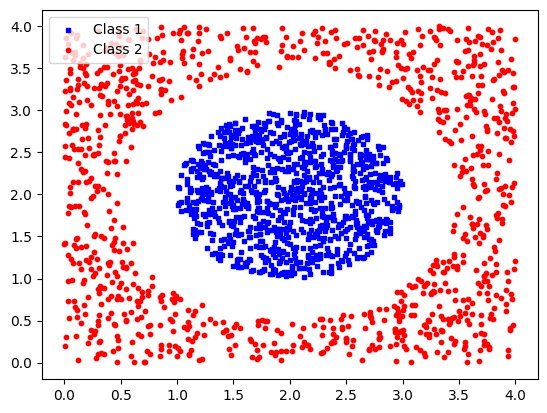

In [57]:
#Plotting the 2d data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(xpoints,ypoints, s=10, c='b', marker="s", label='Class 1')
ax1.scatter(xrpoints,yrpoints, s=10, c='r', marker="o", label='Class 2')
plt.legend(loc='upper left')
plt.show()

In [58]:
#Finding the z-values via the mapping function
transformed_zrpoints = np.multiply(np.subtract(np.sqrt(np.add(np.square(np.subtract(np.array(xrpoints),x)),np.square(np.subtract(np.array(yrpoints),y)))),r),3)

transformed_zpoints = np.multiply(np.subtract(np.sqrt(np.add(np.square(np.subtract(np.array(xpoints),x)),np.square(np.subtract(np.array(ypoints),y)))),r),3)

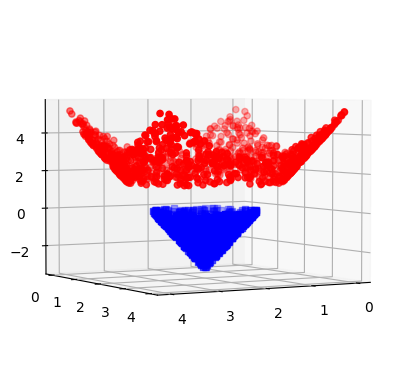

In [59]:
#Plotting the 3d figure
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xpoints, ypoints, transformed_zpoints, c='b', marker="s", label='Class 1');
#Chaning the view
ax.view_init(3, 60)
ax.scatter3D(xrpoints,yrpoints, transformed_zrpoints, c='r', marker="o", label='Class 2');

In [60]:
#Training
#zipping the list of points into a list of tuples of points in the form (x,y,z)
X = list(zip(xpoints,ypoints,transformed_zpoints))
X = X + list(zip(xrpoints,yrpoints,transformed_zrpoints))
#Turning the tuples into lists
X = [list(a) for a in X]

#Creating the class labels 
y = []
for i in range(len(X)):
    if i<len(xrpoints):
        y.append(0)
    else:
        y.append(1)
#Training
clf = svm.LinearSVC(dual=True)
clf.fit(X, y)
#Getting the coefficents and intercepts 
w = clf.coef_[0]
b = clf.intercept_

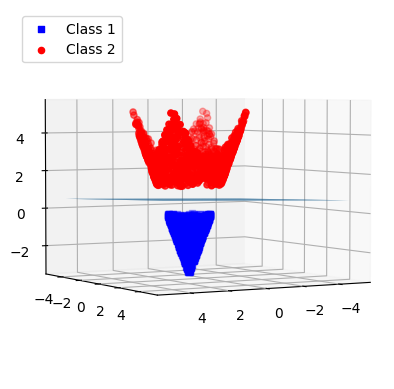

In [61]:
#Plotting the 3d data with hyperplane
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xpoints, ypoints, transformed_zpoints, c='b', marker="s", label='Class 1');
ax.view_init(3, 60)

ax.scatter3D(xrpoints,yrpoints, transformed_zrpoints, c='r', marker="o", label='Class 2');

#Cooridnates for plane
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)

X,Y = np.meshgrid(x,y)
#Finding the Z-coordinates for the plane 
Z=(-1*w[0])*(w[2]**-1)*X + (-1*w[1])*(w[2]**-1)*Y + (b)*-1*(w[2]**-1)

ax.plot_surface(X,Y,Z)
plt.legend(loc='upper left')
plt.show()
        